In [20]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t = symbols( 't', real=True, positive=True )
n, d, k = symbols( 'n d k', positive=True, integer=True )
init_printing(use_unicode=True)

# Define the vector which is not parallel to any edge vector, which will tend to zero:

Phi = t*(N.i + 2*N.j)

# Set the fixed points of the action; P denotes those that belong
# to the core, and Q those that come from the cut extended core:

def P12(n,d):
    return Vector.zero

def P23(n,d):
    return n*N.i

def P13(n,d):
    return n*N.j

def Q12_1(n,d):
    return -d*N.j

def Q12_2(n,d):
    return -d*N.i

def Q23_2(n,d):
    return (n+d)*N.i

def Q23_3(n,d):
    return (n+d)*N.i - d*N.j

def Q13_1(n,d):
    return (n+d)*N.j

def Q13_3(n,d):
    return -d*N.i + (n+d)*N.j

# Basis for the edge/weight vectors for the points 

v1 = N.i

v2 = N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# For each of the right-angled triangles:

def Delta1(n,d):
    return f(P23(n,d), -v1, -v1 + v2 ) * ( f(0*v1 + 0*v2, v1, v1 - v2) + f(d*v1, -v1, -v2) + f(d*v1 - d*v2, v2, -v1 + v2) )

def Delta2(n,d):
    return f(P13(n,d), v1 - v2, -v2 ) * ( f(0*v1 + 0*v2, v2, -v1 + v2) + f(d*v2, -v1, -v2) + f(-d*v1 + d*v2, v1, v1 - v2) )

def Delta3(n,d):
    return f(P12(n,d), v1 , v2 ) * ( f(0*v1 + 0*v2, -v1, -v2) + f(-d*v1, v1, v1 - v2) + f(-d*v2, v2, -v1 + v2) )


def Sum(n,d):
    return Delta1(n,d) + Delta2(n,d) + Delta3(n,d)

# Take the limit as t -> 0 to get the Euler characteristic(?)

def EulerCalculation(n,d):
    return limit(Sum(n,d),t,0)


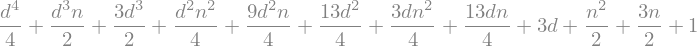

In [4]:
EulerCalculation(n,d) # Letting t -> 0  to obtain the Euler characteristic (n.b. degree-0 term in a is equal to lattice point count for CP2's polytope)

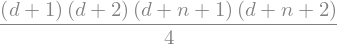

In [5]:
factor(EulerCalculation(n,d))

In [6]:
def Euler(n,d):
    return simplify( Rational(1,4) * ( (d+1)*(d+2)*(n+d+1)*(n+d+2) ) )

In [13]:
def Diff(n,d):
    return factor(Euler(n,d) - Euler(n,d-1))

In [10]:
Euler(k,0) # The usual formula for the number of lattice points in the dilated 2-simplex

In [16]:
Diff(n,1)

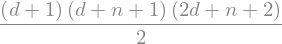

In [17]:
Diff(n,d)

In [27]:
3*((n + d + 1) + (n + d + 2) + (n + d + 3))

In [28]:
Diff(n,3)